# The SuperStore Dataset
## Use Case
- Get Business Insight about how many product sold every month
- Get business insight about how much customer spend their money every month
- To reduce risk in deciding where, when, how, and to whom a product, service, or brand will be marketed.
- To increase marketing efficiency by directing effort specifically toward the designated segment in a manner consistent with that segment’s characteristics.
- To predict profit by each month

## Business Understanding
<b> With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking your knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid.</b>

This case has some business question using the data:
- How many product sold every month?
- How much customer spend their money every month?
- How Sales performance based the region?
- How about Customer segmentation analysis?
- How about discount amount related to profit?
- How about recommendation based on customer segmentation?
- How about recommended amount of discount given to the customer?

## Data Understanding
- Data of Superstore transaction from January 3rd 2017 to December 30th 2020
- Source Data: DQLab
- The dataset has 20 columns and 9994 rows

Data Dictionary:
- Order ID: Unique ID for each row.
- Customer ID: Unique ID to identify each Customer.
- Postacl Code: Postal code of every Customer.
- Product ID: Unique ID for the product
- Sales: Sales of the Product
- quantity: Quantity of the Product
- Discount: Discount Provided
- Profit: Profit/Loss incurred
- Category: Category of the product ordered
- Sub-Category: Sub-Category of the product ordered
- Product Name: Name of the Product.
- Order Date: Order Date of the Product.
- Ship Date: Shipping Mode specified by the Customer.
- Customer Name: Name of the Customer.
- Segment: The segment where customer belongs.
- Country: Country where Customer belong.
- City: City of residence of the Customer.
- State: State of residence of the Customer
- Region: Region where customer belong

## Data Preparation
Code used:
- Python version: 3.11.7
- Packages: Pandas, Numpy, Matplotlib, Seaborn, SKlearn, and Feature Engine

In [395]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import plotly.offline as pyoff
import plotly.graph_objs as go

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import feature_engine
from feature_engine.outliers import Winsorizer

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score

from sklearn.model_selection import train_test_split

## 1. Read Dataset

In [396]:
df = pd.read_csv('..\Dataset\SuperStore - data.csv')
df = df.rename({'Country/Region': 'Country'}, axis=1)

In [397]:
df.duplicated().any()

True

In [398]:
# Checking duplicated row
df[df.duplicated()==True]
df.drop_duplicates(inplace=True)

In [399]:
# Check Dataset
df.head()

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country,City,State,Region
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,Bush Somerset Collection Bookcase,11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,6/12/2019,6/16/2019,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South


In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       9993 non-null   object 
 1   Customer_ID    9993 non-null   object 
 2   Postal_Code    9993 non-null   int64  
 3   Product_ID     9993 non-null   object 
 4   Sales          9993 non-null   float64
 5   Quantity       9993 non-null   int64  
 6   Discount       9993 non-null   float64
 7   Profit         9993 non-null   float64
 8   Category       9993 non-null   object 
 9   Sub-Category   9993 non-null   object 
 10  Product_Name   9993 non-null   object 
 11  Order_Date     9993 non-null   object 
 12  Ship_Date      9993 non-null   object 
 13  Ship_Mode      9993 non-null   object 
 14  Customer_Name  9993 non-null   object 
 15  Segment        9993 non-null   object 
 16  Country        9993 non-null   object 
 17  City           9993 non-null   object 
 18  State        

In [401]:
# Simple Descriptive Analysis
df.describe()

,Postal_Code,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,55191.567998,229.852846,3.789753,0.156188,28.660971
std,32065.085638,623.276074,2.225149,0.206457,234.271476
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.731000
50%,56560.000000,54.480000,3.000000,0.200000,8.671000
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [402]:
df.nunique()

Order_ID         5009
Customer_ID       793
Postal_Code       632
Product_ID       1862
Sales            5825
Quantity           14
Discount           12
Profit           7287
Category            3
Sub-Category       17
Product_Name     1817
Order_Date       1236
Ship_Date        1334
Ship_Mode           4
Customer_Name     793
Segment             3
Country             1
City              531
State              49
Region              4
dtype: int64

In [403]:
# we can see that the country column only has 1 value, so we can drop it
df.drop('Country', axis=1, inplace=True)

In [404]:
# Quantity Check
df = df[df['Quantity']>0]

In [405]:
# Datetime Format
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])

# 2. EDA

#### <h2>How many product sold every month?</h2>

In [406]:
df['year'] = df['Order_Date'].apply(lambda x: x.year)
df['month'] = df['Order_Date'].apply(lambda x: x.month)

In [407]:
df_eda1 = df.groupby(['year','month']).agg({'Quantity':'sum'})
df_eda1.reset_index(inplace=True)
df_eda1.head()

,year,month,Quantity
0,2017,1,284
1,2017,2,159
2,2017,3,585
3,2017,4,534
4,2017,5,466


In [408]:
# Lineplot
def Lineplot_df(df, x, y, hue=None,title=""):
    plt.figure(figsize=(12,6))
    sns.set_style("darkgrid")
    
    sns.lineplot(
        data= df,
        x = x,
        y = y,
        hue=hue,
        palette=sns.color_palette(),
        linewidth=3,
        marker='o'
    ).set(title=title)
    plt.xticks(range(1, 13))

C:\Users\Asus\AppData\Local\Temp\ipykernel_19908\3237156907.py:6: UserWarning:

The palette list has more values (10) than needed (4), which may not be intended.



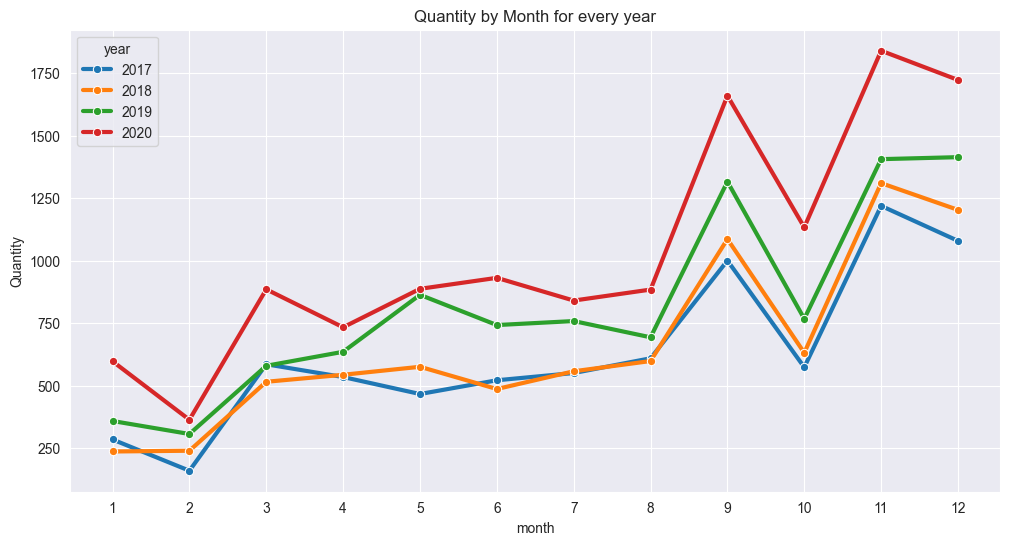

In [409]:
Lineplot_df(df_eda1, 'month', 'Quantity','year', 'Quantity by Month for every year')

#### How Much Customer spend their money every month?

In [410]:
df[df['Product_ID']=='FUR-TA-10000577'].sort_values('Quantity', ascending=False).head(3)

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,...,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,City,State,Region,year,month
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,...,2018-10-11,2018-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,2018,10
1562,US-2020-102890,SG-20470,10011,FUR-TA-10000577,1044.6300,5,0.40,-295.9785,Furniture,Tables,...,2020-06-30,2020-06-30,Same Day,Sheri Gordon,Consumer,New York City,New York,East,2020,6
2609,CA-2017-127446,MC-17590,76017,FUR-TA-10000577,1218.7350,5,0.30,-121.8735,Furniture,Tables,...,2017-11-25,2017-11-30,Standard Class,Matt Collister,Corporate,Arlington,Texas,Central,2017,11


This means that the sales column is the final sales result after multiplying by quantity and discount. <br></br>
So we dont need to calculate Sales anymore

In [411]:
df['month'] = df['month'].astype(str)
df['year'] = df['year'].astype(str)

In [412]:
df_eda2 = df.groupby(['month'])['Sales'].sum()
df_eda2 = df_eda2.reset_index()
df_eda2['month'] = df_eda2['month'].astype(int)
df_eda2 = df_eda2.sort_values('month')

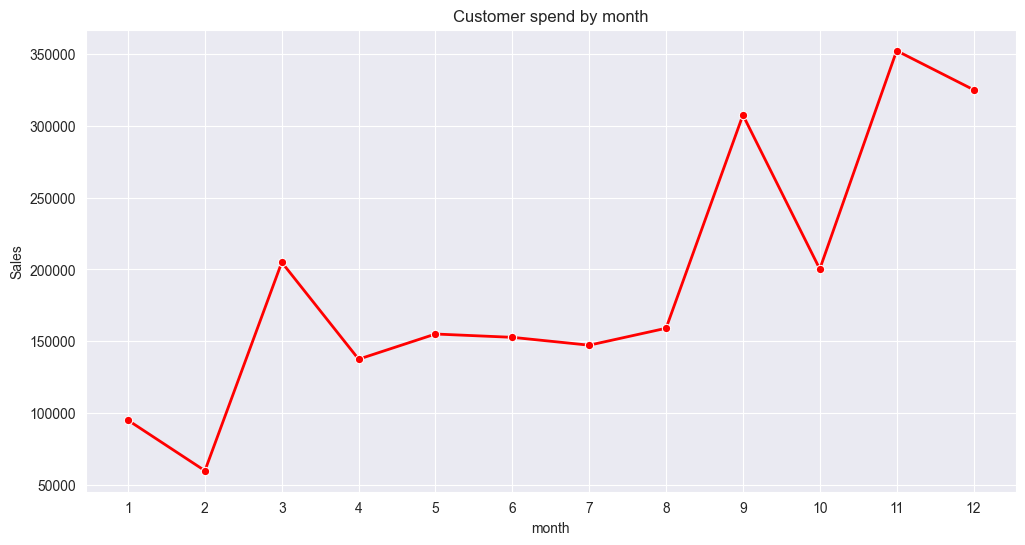

In [413]:
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")

sns.lineplot(
    data=df_eda2,
    x='month',
    y='Sales',
    linewidth=2,
    color='red',
    marker='o'
).set(title='Customer spend by month')
plt.xticks(range(1, 13))
plt.show()

#### <h2>How Sales Performance by Region</h2>

In [414]:
df_eda3 = df[['Region', 'Sales']]
df_eda3 = df_eda3.groupby('Region').agg({
    'Sales' : 'sum'
}).reset_index().sort_values('Sales')
df_eda3

,Region,Sales
2,South,391721.9050
0,Central,501239.8908
1,East,678499.8680
3,West,725457.8245


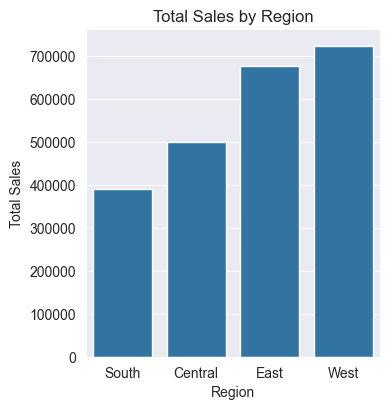

In [415]:
sns.set_style("darkgrid")

g = sns.catplot(
    data=df_eda3,
    x='Region',
    y='Sales',
    kind='bar',
    height=4
).set(title='Total Sales by Region')
g.set_axis_labels("Region", "Total Sales")

We can see the differences for sales between West and South Region, neaerly 2 times

#### <h2>Customer Segmentation Analysis</h2>

##### <h3><b>RFM Analysis</b></h3>
<b> Recency Frequency Monetary (RFM)</b> <br></br>
RFM analysis allows you to segment customers by the frequency and value of purchases and identify those customers who spend the most money.
- Recency — how long it’s been since a customer bought something from us.
- Frequency — how often a customer buys from us.
- Monetary value — the total value of purchases a customer has made.

The last Order Date is December 30th, 2020. we will use this date to calculate Recency

In [416]:
now = max(df['Order_Date'])
df['Date'] = pd.DatetimeIndex(df.Order_Date)

In [417]:
# Recency

df_recency = df.groupby(['Customer_ID'],as_index=False)['Date'].max()
df_recency.columns = ['CustomerID','Last_Purchase_Date']

df_recency['Recency'] = df_recency['Last_Purchase_Date'].apply(lambda x: (now-x).days)
df_recency.drop(columns=['Last_Purchase_Date'],inplace=True)
df_recency.head()

,CustomerID,Recency
0,AA-10315,184
1,AA-10375,19
2,AA-10480,259
3,AA-10645,55
4,AB-10015,416


In [418]:
# Frequency - Monetary

df_fm = df.groupby(['Customer_ID']).agg({
    'Order_ID':'count',
    'Sales': 'sum'
}).reset_index()

df_fm.columns = ['CustomerID','Frequency', 'Monetary']
df_fm.head()

,CustomerID,Frequency,Monetary
0,AA-10315,11,5563.560
1,AA-10375,15,1056.390
2,AA-10480,12,1790.512
3,AA-10645,18,5086.935
4,AB-10015,6,886.156


In [419]:
# merging rfm table
df_rfm = pd.merge(df_recency, df_fm, on='CustomerID')
df_rfm

,CustomerID,Recency,Frequency,Monetary
0,AA-10315,184,11,5563.560
1,AA-10375,19,15,1056.390
2,AA-10480,259,12,1790.512
3,AA-10645,55,18,5086.935
4,AB-10015,416,6,886.156
...,...,...,...,...
788,XP-21865,43,28,2374.658
789,YC-21895,4,8,5454.350
790,YS-21880,9,12,6720.444
791,ZC-21910,54,31,8025.707


Manual

In [420]:
# Quantile for R ranking
rq1 = df_rfm['Recency'].quantile(0.2)
rq2 = df_rfm['Recency'].quantile(0.4)
rq3 = df_rfm['Recency'].quantile(0.6)
rq4 = df_rfm['Recency'].quantile(0.8)

# Quantile for F ranking
fq1 = df_rfm['Frequency'].quantile(0.2)
fq2 = df_rfm['Frequency'].quantile(0.4)
fq3 = df_rfm['Frequency'].quantile(0.6)
fq4 = df_rfm['Frequency'].quantile(0.8)

# Quantile for M ranking
mq1 = df_rfm['Monetary'].quantile(0.2)
mq2 = df_rfm['Monetary'].quantile(0.4)
mq3 = df_rfm['Monetary'].quantile(0.6)
mq4 = df_rfm['Monetary'].quantile(0.8)

In [421]:
# RFM Ranking

df_rfm['RScore'] = df_rfm['Recency'].apply(lambda x: 1 if x<rq1 else 2 if x<rq2 else 3 if x<rq3 else 4 if x<rq4 else 5)
df_rfm['FScore'] = df_rfm['Frequency'].apply(lambda x: 5 if x<fq1 else 4 if x<fq2 else 3 if x<fq3 else 2 if x<fq4 else 1)
df_rfm['MScore'] = df_rfm['Monetary'].apply(lambda x: 5 if x<mq1 else 4 if x<mq2 else 3 if x<mq3 else 2 if x<mq4 else 1)

In [422]:
df_rfm['RScore'].value_counts()

RScore
2    162
4    159
5    159
3    159
1    154
Name: count, dtype: int64

In [423]:
def decision(df):
    if (df['RScore']>=4 & df['FScore']>=4 & df['MScore']>=4):
        return 'Champion'
    
    elif (df['RScore']>=2 & df['FScore']>=3 & df['MScore']>=3):
        return 'Loyal Customer'
    
    elif (df['RScore']>=3 & df['FScore']<=3 & df['MScore']<=3):
        return 'Potential Loyalist'
    
    elif (df['RScore']>=4 & df['FScore']<=1 & df['MScore']<=1):
        return 'New Customer'
    
    elif (3<=df['RScore']<=4  & df['FScore']<=1 & df['MScore']<=1):
        return 'Promising'
    
    elif (2<=df['RScore']<=3 & 2<=df['FScore']<=3 & 2<=df['MScore']<=3):
        return 'Customer Needing Attention'
    
    elif (2<=df['RScore']<=3  & df['FScore']<=2 & df['MScore']<=2):
        return 'About to Sleep'
    
    elif (df['RScore']<=2  & df['FScore']>=2 & df['MScore']>=2):
        return 'At Risk'
    
    elif (df['RScore']<=1  & df['FScore']>=4 & df['MScore']>=4):
        return "Can't Lose Them"
    
    elif (df['RScore']==2  & df['FScore']==2 & df['MScore']==2):
        return 'Hibernating'
    
    elif (df['RScore']==1  & df['FScore']==1 & df['MScore']==1):
        return 'Lost'

In [424]:
# Decision
df_rfm['Decision'] = df_rfm.apply(decision, axis=1)
df_rfm['Decision'].value_counts()

Decision
Potential Loyalist    411
New Customer          256
Champion              118
Name: count, dtype: int64

From many Potentional Decision, there are only 3 Customer type that is Potential Loyalist, New Customer, and Champion

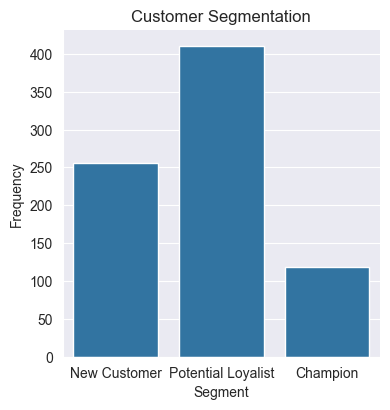

In [425]:
sns.set_style("darkgrid")

g = sns.catplot(
    data=df_rfm,
    x='Decision',
    kind='count',
    height=4
).set(title='Customer Segmentation')
g.set_axis_labels("Segment", "Frequency")

# 3. Data Modeling

### For K-Means Modeling

In [426]:
df_k = df_rfm[['Recency','Frequency', 'Monetary']]
df_k.head()

,Recency,Frequency,Monetary
0,184,11,5563.560
1,19,15,1056.390
2,259,12,1790.512
3,55,18,5086.935
4,416,6,886.156


<Axes: >

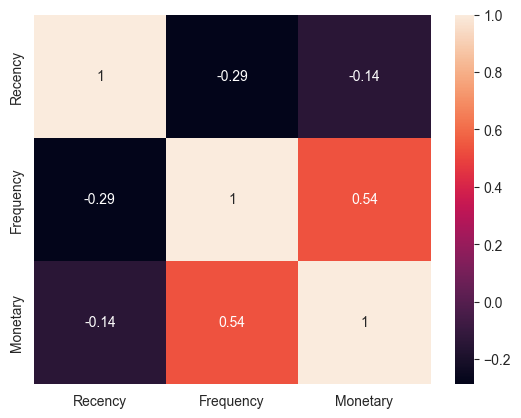

In [427]:
# Correlation HeatMap
sns.heatmap(df_k.corr(), annot=True)

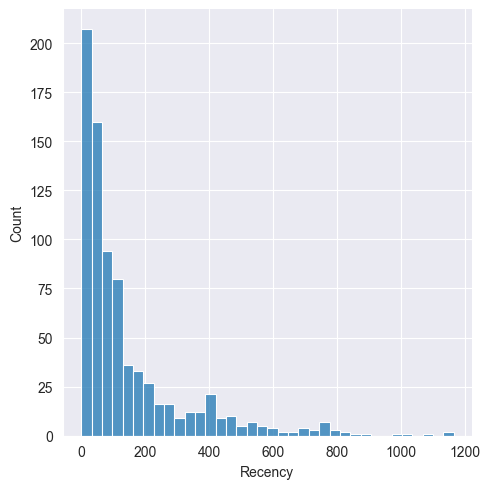

In [428]:
#Analyze distribution

sns.displot(df_k['Recency'])

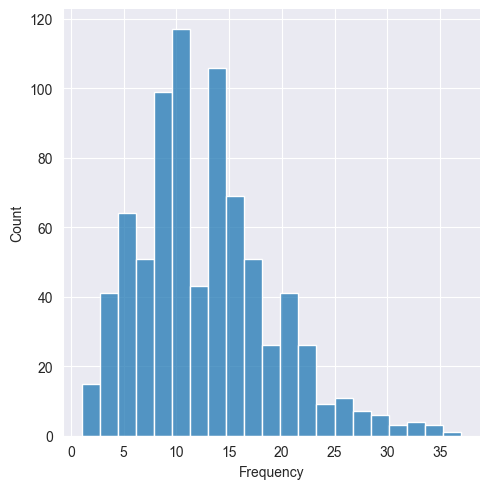

In [429]:
sns.displot(df_k['Frequency'])

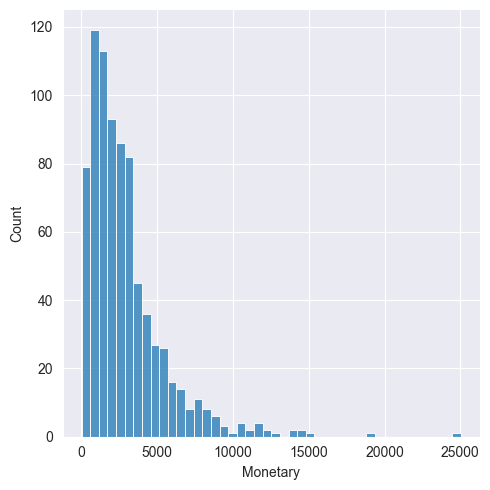

In [430]:
sns.displot(df_k['Monetary'])

K-means gives the best result under the following condition:
- Data's distribution is not skewed
- Data is standardized

from the bar plot above, the recency and monetary data is highly skewed. Therefore we will perform log transformation to reduce the skewness of each variable.

In [431]:
# Because the minimum value from Recency column is 0, we added 1 so it wont become -inf
df_k['Recency'] = df_k['Recency']+1

C:\Users\Asus\AppData\Local\Temp\ipykernel_19908\2281548291.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [432]:
df_k_log = df_k.copy()
df_k_log.head()

,Recency,Frequency,Monetary
0,185,11,5563.560
1,20,15,1056.390
2,260,12,1790.512
3,56,18,5086.935
4,417,6,886.156


In [433]:
df_k_log = df_k_log[['Recency', 'Frequency', 'Monetary']].apply(lambda x: np.log(x))

In [434]:
windsoriser = Winsorizer(tail='both', # cap left, right or both tails 
                          fold=2,
                           variables=[ 'Recency', 'Frequency', 'Monetary']
                        )
windsoriser.fit(df_k_log)

Winsorizer(fold=2, tail='both', variables=['Recency', 'Frequency', 'Monetary'])

In [435]:
# Perform standard scaler

SScaler = StandardScaler()
SScaler.fit(df_k_log)
df_k_Sscaled = SScaler.transform(df_k_log)

In [436]:
df_k_Sscaled = pd.DataFrame(df_k_Sscaled, columns=df_k_log.columns)
df_k_Sscaled.skew().sort_values(ascending=False)

Recency     -0.382306
Frequency   -0.944923
Monetary    -1.321329
dtype: float64

In [437]:
# # Perform MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(df_k_log)
# df_k_Mscaled = scaler.transform(df_k_log)


In [438]:
# df_k_Mscaled = pd.DataFrame(df_k_Mscaled, columns=df_k_log.columns)
# df_k_Mscaled.skew().sort_values(ascending=False)

there is no skewness coefficient differences between StandarScaler and MinMaxScaler,  we will use the StandarScaler so now the dataframe have a mean of 0 and standard deviation of 1.

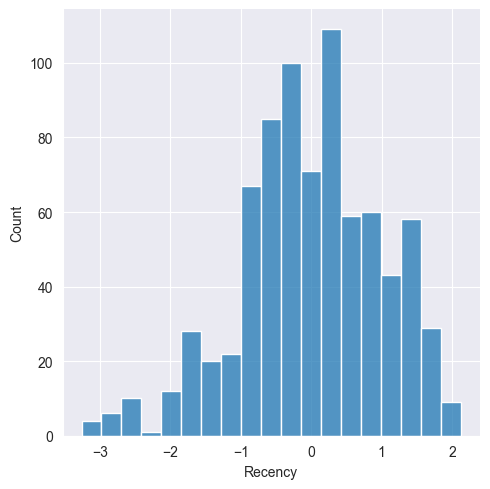

In [439]:
sns.displot(df_k_Sscaled['Recency'])

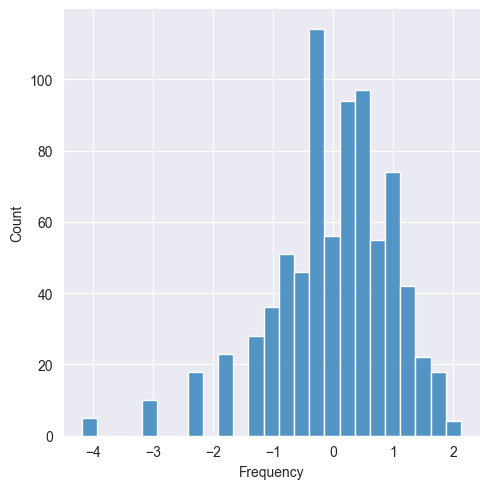

In [440]:
sns.displot(df_k_Sscaled['Frequency'])

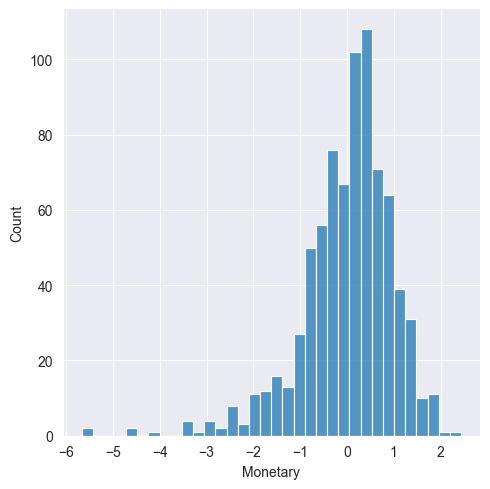

In [441]:
sns.displot(df_k_Sscaled['Monetary'])

In [442]:
X = np.asarray(df_k_Sscaled)

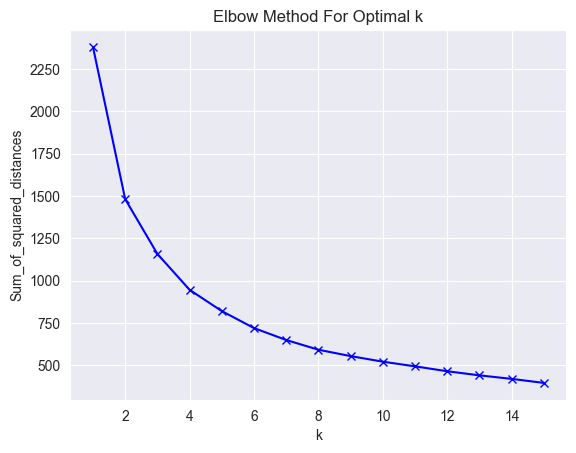

In [443]:
Sum_of_squared_distances = []
K = range(1,16)
for k in K:
    km = KMeans(n_clusters=k, n_init=8,random_state=0)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From the elbow methods we have 3 candidate that is K = 5,6, and 7

## Evaluating K-Means Model

Davies Bouldin Score is a metric for evaluating clustering algorithms. The smaller Davies Bouldin Score is The more optimal the cluster.

K = 5

In [444]:
kmeans = KMeans(n_clusters=5, n_init=5)
kmeans.fit(X)
print(davies_bouldin_score(X, kmeans.labels_))

1.0679844615065617


K=6

In [445]:
kmeans = KMeans(n_clusters=6, n_init=5)
kmeans.fit(X)
print(davies_bouldin_score(X, kmeans.labels_))

1.0911853072803395


K=7

In [446]:
kmeans = KMeans(n_clusters=7, n_init=5)
kmeans.fit(X)
print(davies_bouldin_score(X, kmeans.labels_))

1.1119789875081882


K-Means 7 clusters has lowest davies bouldin score than other cluster. Therefore the optimum cluster is 7.

In [447]:
kmeans = KMeans(n_clusters=7, n_init=5)
kmeans.fit(df_k_Sscaled)
cluster_labels = kmeans.labels_

In [448]:
df_K_7 = df_rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary']]
df_K_7['Label'] = cluster_labels
df_K_7.value_counts('Label')

C:\Users\Asus\AppData\Local\Temp\ipykernel_19908\1481280848.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Label
6    190
5    184
1    150
4    118
0     76
3     51
2     24
Name: count, dtype: int64

In [449]:
df_K_7['Label']=df_K_7['Label']+1
df_K_7.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_19908\2203339748.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CustomerID,Recency,Frequency,Monetary,Label
0,AA-10315,184,11,5563.560,2
1,AA-10375,19,15,1056.390,6
2,AA-10480,259,12,1790.512,2
3,AA-10645,55,18,5086.935,7
4,AB-10015,416,6,886.156,5


In [450]:
df_final1 = df_K_7.groupby('Label').agg({'CustomerID':'count'}).reset_index().rename({'CustomerID':'Frequency'},axis=1).sort_values('Frequency', ascending=False)

C:\Users\Asus\AppData\Local\Temp\ipykernel_19908\2173911873.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Label', ylabel='Frequency'>

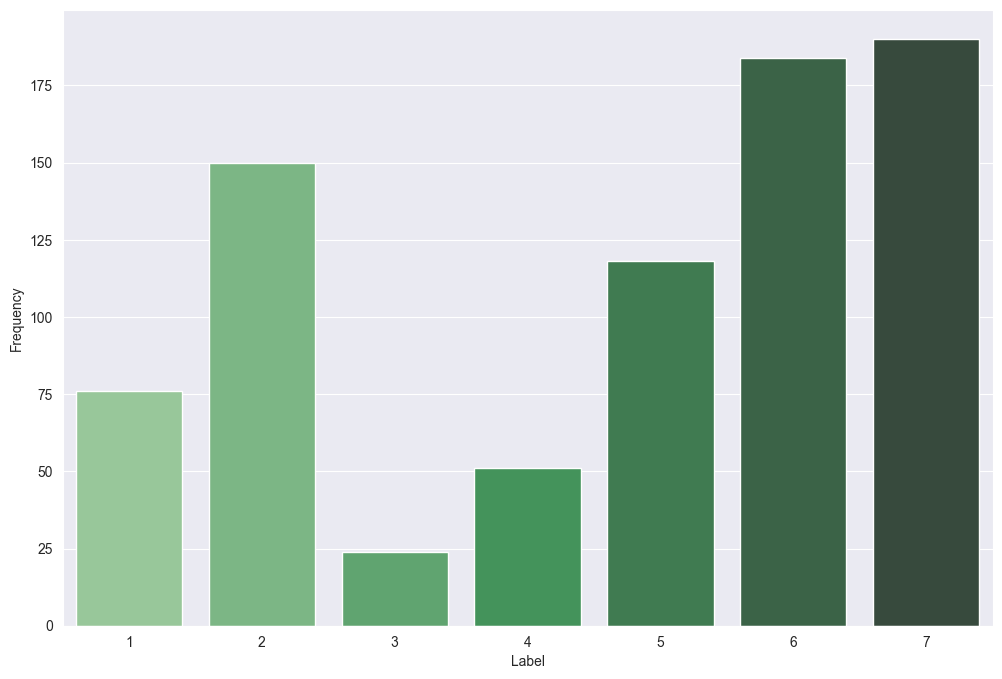

In [451]:
plt.figure(figsize=(12,8))
sns.set_style("darkgrid")

sns.barplot(data=df_final1, x="Label", y="Frequency", palette = "Greens_d")

Interpretation of the cluster formed in k-means

In [452]:
df_K_7.groupby('Label').agg({
    'Recency':'mean',
    'Frequency' : 'mean',
    'Monetary' : ['mean', 'count']
}).round(0)

Recency Frequency Monetary      
         mean      mean     mean count
Label                                 
1         6.0      13.0   3008.0    76
2       257.0      15.0   3904.0   150
3       347.0       2.0    133.0    24
4        52.0       6.0    526.0    51
5       388.0       7.0   1108.0   118
6        66.0      10.0   1975.0   184
7        45.0      19.0   5045.0   190

Group 1 

## Discount Reccomendation

In [453]:
df.head()

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,...,Ship_Date,Ship_Mode,Customer_Name,Segment,City,State,Region,year,month,Date
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,...,2019-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,2019,11,2019-11-08
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,...,2019-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,2019,11,2019-11-08
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,...,2019-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,2019,6,2019-06-12
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,...,2018-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,2018,10,2018-10-11
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,...,2018-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,2018,10,2018-10-11


lets do some analysis to find what sub category makes profit better

In [454]:
df.groupby(['Category','Sub-Category']).agg({'Profit':'sum'}).sort_values('Profit', ascending=False)

Profit
Category        Sub-Category            
Technology      Copiers       55617.8249
                Phones        44515.7306
                Accessories   41936.6357
Office Supplies Paper         34053.5693
                Binders       30221.7633
Furniture       Chairs        26602.2251
Office Supplies Storage       21278.8264
                Appliances    18138.0054
Furniture       Furnishings   13059.1436
Office Supplies Envelopes      6964.1767
                Art            6527.7870
                Labels         5546.2540
Technology      Machines       3384.7569
Office Supplies Fasteners       949.5182
                Supplies      -1189.0995
Furniture       Bookcases     -3472.5560
                Tables       -17725.4811

seems like there are a negative profit from Supplies, Bookcases, and Tables Sub-Category

In [455]:
df_eda4 = df.groupby(['Sub-Category']).agg({'Profit':'mean', 'Discount':'mean','Sales':'mean','Order_ID':'count'}).reset_index().sort_values('Order_ID', ascending=True)
df_eda4

,Sub-Category,Profit,Discount,Sales,Order_ID
6,Copiers,817.909190,0.161765,2198.941618,68
11,Machines,29.432669,0.306087,1645.553313,115
15,Supplies,-6.258418,0.076842,245.650200,190
8,Fasteners,4.375660,0.082028,13.936774,217
4,Bookcases,-15.230509,0.211140,503.859633,228
7,Envelopes,27.418019,0.080315,64.867724,254
16,Tables,-55.565771,0.261285,648.794771,319
10,Labels,15.236962,0.068681,34.303055,364
1,Appliances,38.922758,0.166524,230.755710,466
5,Chairs,43.185430,0.169968,532.739823,616


from the table above, I conclude that:
- Negative profits from the Table and Bookcases Sub Category are caused by the average sales being too high (expensive) but there is a high frequency of purchases and discounts (top 4)
- The negative profit from the Supplies Sub Category is caused by small discounts so that the frequency of purchases is small (3rd least buyer )

From the cases above we try to predict how much discount given to customer to increase / stabilize profit

In [456]:
df['Discount'].value_counts()

Discount
0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     226
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: count, dtype: int64

In [457]:
df_2 = df.copy()

In [458]:
df_2.head()

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,...,Ship_Date,Ship_Mode,Customer_Name,Segment,City,State,Region,year,month,Date
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,...,2019-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,2019,11,2019-11-08
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,...,2019-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,2019,11,2019-11-08
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,...,2019-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,2019,6,2019-06-12
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,...,2018-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,2018,10,2018-10-11
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,...,2018-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,2018,10,2018-10-11


Because Table, Bookcase, and Supplies sub category have a negative profit. We will not use them as a training data

In [459]:
df_2['Shipping_Time'] = df_2['Ship_Date']-df_2['Order_Date']

In [460]:
df_2['Shipping_Time'] = df_2['Shipping_Time'].astype(str)

In [461]:
df_2['Shipping_Time'] = df_2['Shipping_Time'] .apply(lambda x: x.split(' ')[0])
df_2['Shipping_Time'] = df_2['Shipping_Time'].astype(int)

In [462]:
df_model = df_2[~df_2['Sub-Category'].isin(['Table', 'Bookcase', 'Supplies'])]

In [463]:
df_model = df_model.groupby('Product_ID').agg({
                        'Sales' : 'mean',
                        'Quantity':'mean',
                        'Discount':'mean',
                        'Profit':'mean',
                        'Shipping_Time':'mean'
                    }).reset_index()

In [464]:
df_model.drop('Product_ID',axis=1,inplace=True)

In [465]:
X = df_model.drop(['Discount'],axis=1)
y = df_model['Discount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.33,random_state=42)

## Model Development

Linear Regression Model

In [466]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)
model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [467]:
from sklearn.metrics import r2_score

y_test_predict = model.predict(X_test)
print('Model_Test_Accuracy:',r2_score(y_test,y_test_predict))

y_val_predict = model.predict(X_val)
print('Model_Validation_Accuracy:',r2_score(y_val,y_val_predict))

Model_Test_Accuracy: 0.058745327373497136
Model_Validation_Accuracy: 0.022879165448831396


KNN Model

In [468]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_jobs=-1)
model.fit(X_train,y_train)

KNeighborsRegressor(n_jobs=-1)

In [469]:
y_test_predict = model.predict(X_test)
print('Model_Test_Accuracy:',r2_score(y_test,y_test_predict))

y_val_predict = model.predict(X_val)
print('Model_Validation_Accuracy:',r2_score(y_val,y_val_predict))

Model_Test_Accuracy: 0.4338792617158761
Model_Validation_Accuracy: 0.388947602083208


Random Forest Regressor

In [470]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [471]:
y_test_predict = model.predict(X_test)
print('Model_Test_Accuracy:',r2_score(y_test,y_test_predict))

y_val_predict = model.predict(X_val)
print('Model_Validation_Accuracy:',r2_score(y_val,y_val_predict))

Model_Test_Accuracy: 0.48873195370619704
Model_Validation_Accuracy: 0.4160933173543109


The model after using that data is so bad, the best test accuracy value is 0.49

In [482]:
df_2=df.copy()

In [483]:
df_model1 = df_2[~df_2['Sub-Category'].isin(['Table', 'Bookcase', 'Supplies'])]

In [487]:
df_model1.columns

Index(['Order_ID', 'Customer_ID', 'Postal_Code', 'Product_ID', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Category', 'Sub-Category',
       'Product_Name', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_Name',
       'City', 'State', 'Region', 'year', 'month', 'Date', 'Consumer',
       'Corporate', 'Home Office'],
      dtype='object')

In [485]:
segment_dummies = pd.get_dummies(df_model1["Segment"])

In [486]:
df_model1 = pd.concat([df_model1.drop("Segment", axis=1), segment_dummies], axis=1)

In [488]:
df_model1 = df_model1[['Sales', 'Quantity', 'Discount', 'Profit', 'month', 'Corporate', 'Home Office','Consumer']]

In [489]:
X = df_model1.drop(['Discount'],axis=1)
y = df_model1['Discount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.33,random_state=42)

Linear Regression

In [490]:
model = LinearRegression(n_jobs=-1)
model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [491]:
y_test_predict = model.predict(X_test)
print('Model_Test_Accuracy:',r2_score(y_test,y_test_predict))

y_val_predict = model.predict(X_val)
print('Model_Validation_Accuracy:',r2_score(y_val,y_val_predict))

Model_Test_Accuracy: 0.048500965171856536
Model_Validation_Accuracy: 0.028891876885391188


KNN

In [492]:
model = KNeighborsRegressor(n_jobs=-1)
model.fit(X_train,y_train)

KNeighborsRegressor(n_jobs=-1)

In [493]:
y_test_predict = model.predict(X_test)
print('Model_Test_Accuracy:',r2_score(y_test,y_test_predict))

y_val_predict = model.predict(X_val)
print('Model_Validation_Accuracy:',r2_score(y_val,y_val_predict))

Model_Test_Accuracy: 0.8420230649725473
Model_Validation_Accuracy: 0.8368375642436547


Random Forest Regressor

In [494]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [495]:
y_test_predict = model.predict(X_test)
print('Model_Test_Accuracy:',r2_score(y_test,y_test_predict))

y_val_predict = model.predict(X_val)
print('Model_Validation_Accuracy:',r2_score(y_val,y_val_predict))

Model_Test_Accuracy: 0.8820805027596601
Model_Validation_Accuracy: 0.8758926288129203


Looks like the Random Forest Regressor has the best Test and Validation Accuracy

In [496]:
test_check = pd.DataFrame()
test_check['actual'] = y_test
test_check['prediction'] = y_test_predict
test_check

,actual,prediction
3160,0.8,0.793
2193,0.0,0.010
9057,0.0,0.078
9775,0.6,0.650
4186,0.8,0.789
...,...,...
31,0.2,0.077
3576,0.2,0.196
7914,0.0,0.093
1384,0.0,0.055


In [497]:
Val_check = pd.DataFrame()
Val_check['actual'] = y_val
Val_check['prediction'] = y_val_predict
Val_check

,actual,prediction
9535,0.2,0.1800
2516,0.2,0.0040
4745,0.0,0.0050
7927,0.0,0.0860
9223,0.8,0.7990
...,...,...
2680,0.0,0.0570
2259,0.0,0.0080
2942,0.0,0.1900
6404,0.2,0.1635
